<a href="https://colab.research.google.com/github/DariaPokh/Data_analysis/blob/main/%D0%9F%D0%BE%D1%85_%D0%94%D0%B0%D1%80%D1%8C%D1%8F_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B5%D0%B2%D0%BD%D0%B0_%22%D0%9F%D0%B0%D1%80%D1%81%D0%B8%D0%BD%D0%B3_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D1%81_%D1%81%D0%B0%D0%B9%D1%82%D0%BE%D0%B2_%D0%BD%D0%B0_Python_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA_Selenium_%D0%B8_BeautifulSoup_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Установка библиотеки Selenium

In [ ]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 4.1 MB/s 
     |████████████████████████████████| 140 kB 50.7 MB/s 
     |████████████████████████████████| 358 kB 57.1 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


**Установка драйверов в локальную систему**

1. Получить вашу версию драйвера Google по ссылке chrome://version/
2. По указанной ссылке найти драйвер нужной версии и скачать его
3. Положить драйвер в одну директорию с файлом парсера

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [92.1 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.laun

# Задание 1

Написать код, который выполнит ввод слова "Lenovo" в поисковую строку сайта  1000kem.ru (https://1000kem.ru/contacts/) и выполнить поиск
<br>
<br>
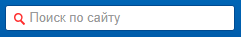

*(подсказка: изучите внимательно документацию и метод send_keys)*

In [ ]:
# Инструмент для автоматизации действий веб-браузера
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time 


def get_source_html(url):
  # Установка параметров для headless браузера 
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  
  # Инициализация сессии браузера 
  driver = webdriver.Chrome('chromedriver', options=options)
  # Переход по ссылке 
  driver.get(url)
  time.sleep(3)
  
  try:
    # Ввести текст в поле ввода
    field = driver.find_element(By.ID, 'title-search-input')
    time.sleep(3)
    field.send_keys('Lenovo')
    time.sleep(3)
    field.click()
  except NoSuchElementException:
    print('Элемент не найден')
  except Exception as ex:
    print(ex, "*******************")
    
  return driver.page_source

html = get_source_html("https://1000kem.ru/contacts/")
html

# Задание 2

Соберите информацию с сайта nbcomputers.ru (https://www.nbcomputers.ru/catalog/noutbuki/) о ноутбуках данного интернет-магазина.
<br>
Данные, которые необходимы:
* Название ноутбука
* Цена ноутбука
* Код товара

Результат необходимо записать в CSV файл.
<br>
*(совет: обязательно делайте различные временные промежутки между прокликами)*

In [ ]:
# Инструмент для автоматизации действий веб-браузера
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time 
from bs4 import BeautifulSoup
import csv
import re


def get_source_html(url):
    # Установка параметров для headless браузера 
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')

    # Инициализация сессии браузера 
    driver = webdriver.Chrome('chromedriver', options=options)
    # Переход по ссылке 
    driver.get(url)
    time.sleep(3)

    while True:
        try:
            # Клик на кнопку "Показать еще"
            driver.find_element(by=By.CSS_SELECTOR, value="span.catalog-items_more-link_label").click()
            time.sleep(3)
        except NoSuchElementException:
            print('Элемент не найден')
            break
        except Exception as ex:
            print(ex, "*******************")
            break
    return driver.page_source
    


def parse_page(page):
  info_list = []
  product_dict = {}
  names = page.select("a.catalog-items_link")
  prices = page.select("div.catalog-items_new-price")
  codes = page.select("div.catalog-items_code")
  for index in range(len(names)):
    product_dict = {}
    product_dict["Название ноутбука"] = names[index].text
    product_dict["Цена ноутбука"] = ''.join([s for s in re.findall(r'-?\d+\.?\d*', prices[index].text)])
    product_dict["Код товара"] = ''.join([s for s in re.findall(r'-?\d+\.?\d*', codes[index].text)])
    info_list.append(product_dict)
  return info_list

def save_result(result):
    f = open("product.csv", "w")
    writer = csv.DictWriter(f, fieldnames=result[0].keys())
    writer.writeheader()
    for item in result:
        writer.writerow(item)

html = get_source_html("https://www.nbcomputers.ru/catalog/noutbuki/")
soup = BeautifulSoup(html)
parse = parse_page(soup)
save_result(parse)          


Message: stale element reference: element is not attached to the page document
  (Session info: headless chrome=101.0.4951.64)
Stacktrace:
#0 0x55cf5593d553 <unknown>
#1 0x55cf55628183 <unknown>
#2 0x55cf5562b2c9 <unknown>
#3 0x55cf5562b0e3 <unknown>
#4 0x55cf5562b377 <unknown>
#5 0x55cf556601fe <unknown>
#6 0x55cf5565449d <unknown>
#7 0x55cf5567bf82 <unknown>
#8 0x55cf55653e36 <unknown>
#9 0x55cf5567c3be <unknown>
#10 0x55cf55690d6c <unknown>
#11 0x55cf5567c363 <unknown>
#12 0x55cf5565247c <unknown>
#13 0x55cf55653945 <unknown>
#14 0x55cf559ad9d0 <unknown>
#15 0x55cf55972a38 <unknown>
#16 0x55cf5597275c <unknown>
#17 0x55cf55972fc2 <unknown>
#18 0x55cf559ab71b <unknown>
#19 0x55cf55973221 <unknown>
#20 0x55cf559565b3 <unknown>
#21 0x55cf5597c988 <unknown>
#22 0x55cf5597cb1a <unknown>
#23 0x55cf55995a41 <unknown>
#24 0x7f9635c336db <unknown>
 *******************
